#Aula prática 9 de ORI 2023-1 (26/09/2023)

* Processamento de Língua Natural com NLTK (n-gramas)
* Exemplos com corpus Machado
* Geração de sentenças automáticas com pacote markovify
* Geração de núvem de palavras

Professor: Wendel Melo

Referência: http://www.facom.ufu.br/~wendelmelo/terceiros/tutorial_nltk.pdf

Link para a gravação da aula:


$n$-gramas

Um $n$-grama é uma sequência de $n$ termos em um texto.

* Bigramas: sequências de dois termos seguidos no texto
* Trigramas: sequências de três termos seguidos no texto
* 4-gramas: sequências de quatro termos seguidos no texto

Por exemplo, na frase: Vovô viu a uva

* Bigramas: ('Vovô', 'viu'), ('viu', 'a'), ('a', 'uva')
* Trigramas: ('Vovô', 'viu', 'a'), ('viu', 'a', 'uva')

Vamos usar o pacote nltk para montar os n-gramas. Para isso, vamos usar um texto pronto do corpus.


In [ ]:
#precisamos instalar o nltk
!pip install -U nltk

Vamos usar o corpus machado do NLTK, que fornece os livros completos do Machado de Assis


In [ ]:
import nltk
import nltk.corpus

help(nltk.corpus)

In [ ]:
#baixando o corpus machado do nltk
import nltk
nltk.download('machado')
nltk.download('punkt')
nltk.download('stopwords')

[nltk_data] Downloading package machado to /root/nltk_data...
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


True

In [ ]:
from nltk.corpus import machado
help(machado)

Vamos fazer um exemplo para trabalhar com o corpus do livro Quincas Borba. Vamos descobrir os 20 pares de bigramas mais comuns

In [ ]:
import nltk
import string
from nltk.corpus import machado

#vamos obter uma string com o conteúdo do livro Quincas Borba
texto = machado.raw('romance/marm07.txt')   #Quinas Borba

#vamos remover stopwords e sinais de pontuacao
pontuacao = list(string.punctuation) + ['...', "''", '\x97']
stopwords = nltk.corpus.stopwords.words('portuguese')

tokens = nltk.word_tokenize(texto) #separa as palavras do texto

tokens = [t for t in tokens if t.lower() not in stopwords and t not in pontuacao ]

#vamos obter uma lista de bigramas
bigramas = nltk.ngrams(tokens, 2)
bigramas = list(bigramas)

#print(bigramas)

#tendo os pares de bigramas, podemos calcular os pares mais frequentes no texto
freqs = nltk.FreqDist(bigramas)
maiscomuns = freqs.most_common(20)  #obtém os 20 bigramas mas frequentes na lista de tokens

print("Bigramas mais comuns:\n")
for big in maiscomuns:
  print("Bigrama: ", big[0], "frequencia: ", big[1])


Bigramas mais comuns:

Bigrama:  ('Carlos', 'Maria') frequencia:  109
Bigrama:  ('Maria', 'Benedita') frequencia:  104
Bigrama:  ('Quincas', 'Borba') frequencia:  97
Bigrama:  ('D.', 'Fernanda') frequencia:  90
Bigrama:  ('outra', 'vez') frequencia:  37
Bigrama:  ('D.', 'Tonica') frequencia:  35
Bigrama:  ('alguma', 'coisa') frequencia:  32
Bigrama:  ('outra', 'coisa') frequencia:  23
Bigrama:  ('Rio', 'Janeiro') frequencia:  19
Bigrama:  ('algum', 'tempo') frequencia:  19
Bigrama:  ('alguns', 'instantes') frequencia:  18
Bigrama:  ('si', 'mesma') frequencia:  18
Bigrama:  ('Santa', 'Teresa') frequencia:  16
Bigrama:  ('dia', 'seguinte') frequencia:  14
Bigrama:  ('outro', 'lado') frequencia:  14
Bigrama:  ('Vossa', 'Senhoria') frequencia:  14
Bigrama:  ('Rua', 'Harmonia') frequencia:  13
Bigrama:  ('perguntou', 'Rubião') frequencia:  12
Bigrama:  ('alguns', 'segundos') frequencia:  12
Bigrama:  ('disse', 'Rubião') frequencia:  11


Outra utilidade pros $n$-gramas é descobrir as chamadas entidades nomeadas. Por exemplo, podemos listar todos os $n$-gramas cujos termos começam com letra maiúscula, tendo assim uma lista de possíveis entidades nomeadas.

Exercício: modificar o código anterior para obter uma lista com as possíveis entidades nomeadas.

In [ ]:
nltk.download('genesis')

[nltk_data] Downloading package genesis to /root/nltk_data...
[nltk_data]   Unzipping corpora/genesis.zip.


True

In [ ]:
# nltk também possui o corpus gênesis, que apresenta o texto do livro gênesis da bíblia
from nltk.corpus import genesis #corpus do livro genesis da biblia
texto2 = genesis.raw('portuguese.txt')

print(texto2)

# Geradores de texto

Podemos usar algoritmos de Inteligência Artificial para aprender um padrão de escrita, isto é, fornecemos texto para o algoritmo e ele então passa a ser capaz de tentar gerar novas peças de texto que sigam o padrão aprendido.

Para esse tipo de atividade, é comum usar algoritmos baseados em cadeias de markov.

Vamos usar o pacote markovify do python para gerar um algoritmo desse tipo baseado em cadeia de markov:

Para instalar o markovify, usamos algum dos seguintes comandos no terminal:

* pip install -U markovify
* pip3 install -U markovify
* py -m pip install -U markovify
* python -m pip install -U markovify
* python3 -m pip install -U markovify

In [ ]:
!pip install -U markovify

Vamos fazer um código que aprende o padrão de escrita do livro Dom Casmurro, de Machado de Assis

In [ ]:
#código que gera 10 frases aleatória seguindo o padrão de escrita do livro Dom Casmurro

from nltk.corpus import machado
import markovify

#obtendo o texto do Dom Casmurro
texto = machado.raw('romance/marm08.txt')   #Dom Casmurro

#treinando um modelo de Markov com o conteúdo do conteúdo do Dom Casmurro
modelo = markovify.Text(texto)

# Usando o modelo treinado para gerar sentenças automaticamente
NSENTENCAS = 10
for i in range(1, NSENTENCAS+1):
  print( f"Frase {i}: ", modelo.make_sentence() )

Frase 1:  A mesma situação nova agravou a minha reclusão, mas nem esta razão a moveu.
Frase 2:  Pelo que me confessasse quantos, quantos, quantos já lhe iam ficando mais repetidos, como os outros homens do cemitério.
Frase 3:  Também vi a mãe não indo ao quarto e voltou com dez libras esterlinas que fizeram isto, nem o que havia, e recebi licença para ir até o ponto essencial.
Frase 4:  A demora da contemplação creio que não, inquiriu-me sobre o seminário do mundo também.
Frase 5:   Padeceu muito! suspirou o pai era o filho dormia.
Frase 6:  As nossas mulheres viviam na casa uma da outra, como a vaga que se devem incutir na alma de lepidez nova.
Frase 7:   Que se não der nenhum é que não tinha nada.
Frase 8:   Como devem ser cumpridas conforme Deus quer.
Frase 9:  Foi talvez um ano.
Frase 10:  Jurisprudência, filosofia e política acudiram-me, mas não passava, o coche parava à nossa casa.


# Exemplo: gerando uma nuvem de palavras

Vamos usar um pacote chamado wordcloud. Para instalar, use um dos comandos a seguir:

* pip install -U wordcloud
* pip3 install -U wordcloud
* py -m pip install -U wordcloud
* python -m pip install -U wordcloud
* python3 pip install -U wordcloud

In [ ]:
!pip install -U wordcloud

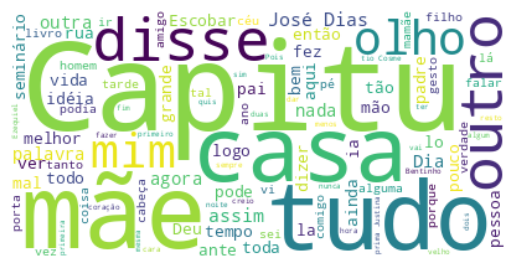

In [ ]:
#gerando uma nuvem de palavras com as palavras mais frequentes do livro Dom Casmurro

import wordcloud
import nltk
from nltk.corpus import machado
import matplotlib.pyplot as plt

texto = machado.raw('romance/marm08.txt')
listaStopwords = nltk.corpus.stopwords.words("portuguese") + ["capítulo"]

nuvem = wordcloud.WordCloud( stopwords = listaStopwords,
                            background_color='white',
                             max_words = 100 ).generate(texto)

plt.imshow( nuvem, interpolation='bilinear' )
plt.axis('off')
plt.show()

#para salvar a uvem de palavras em um arquivo
nuvem.to_file("nuvem_palavras.png")